In [1]:
# Import dependencies
import pandas as pd
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from dateutil.parser import parse

In [2]:
# %matplotlib notebook

In [3]:
file = pd.read_csv('AnalyticalResults_Honey_Pesticides.csv')
file

df = file
df

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,Commodity Type,Variety,Commodity Claim,Facility Type,Origin,Country,State,Quantity,EPA Tolerance (ppm)
0,CA0710100004HYUS2,HY,124,Coumaphos,0.0011,0.001,M,NaN,SM,O,RE,Clover,NC,R,1,NaN,KS,NaN,0.15
1,CA0710100146HYUS2P,HY,297,Fluvalinate,0.0019,0.001,M,NaN,SM,O,RE,Clover,NC,R,1,NaN,ID,NaN,0.05
2,CA0710100406HYUS2P,HY,297,Fluvalinate,0.0026,0.001,M,NaN,SM,O,RE,Pure Clover,NC,R,1,NaN,OH,NaN,0.05
3,CA0710100514HYUS2,HY,297,Fluvalinate,0.0025,0.001,M,NaN,SM,O,RE,Clover Honey,NC,R,1,NaN,IA,NaN,0.05
4,CA0710100560HYUS2,HY,254,"Dicofol p,p'",0.0013,0.001,M,V,SM,O,RE,Clover: Us Grade A,NC,R,1,NaN,IA,NaN,NT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,WA1707310011HYUS2,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0060,0.003,M,NaN,NaN,O,RE,Pure U.S. Grade A Cl,NC,D,2,Canada / India / Ukraine / USA,NaN,NaN,0.2
778,NY0806100011HYUS2P,HY,070,Piperonyl butoxide,0.0087,0.006,M,NaN,SM,O,RE,Unknown,NC,R,2,Unknown Country,NaN,NaN,10
779,NY0806100011HYUS2P,HY,124,Coumaphos,0.0028,0.001,M,NaN,SM,O,RE,Unknown,NC,R,2,Unknown Country,NaN,NaN,0.15
780,NY0806100011HYUS2P,HY,254,"Dicofol p,p'",0.0018,0.001,M,V,SM,O,RE,Unknown,NC,R,2,Unknown Country,NaN,NaN,NT


In [4]:
# Check unique Pesticide Values
df['Pesticide Name'].value_counts()

2,4-dimethylphenyl formamide (2,4-DMPF)    319
Coumaphos                                  264
Fluvalinate                                 88
Thymol                                      43
Dicofol p,p'                                35
Piperonyl butoxide                          10
Vinclozolin                                  5
Carbendazim (MBC)                            4
Dicloran                                     3
Azoxystrobin                                 3
Alachlor                                     3
2,6-dichlorobenzamide                        2
Permethrin Total                             1
Chlorpyrifos                                 1
Methoxyfenozide                              1
Name: Pesticide Name, dtype: int64

In [5]:
# Drop erroneous values: Removing Permethrin Total because total does not work in set
df = df[df['Pesticide Name'] != 'Permethrin Total']
df['Pesticide Name'].value_counts()

2,4-dimethylphenyl formamide (2,4-DMPF)    319
Coumaphos                                  264
Fluvalinate                                 88
Thymol                                      43
Dicofol p,p'                                35
Piperonyl butoxide                          10
Vinclozolin                                  5
Carbendazim (MBC)                            4
Dicloran                                     3
Azoxystrobin                                 3
Alachlor                                     3
2,6-dichlorobenzamide                        2
Chlorpyrifos                                 1
Methoxyfenozide                              1
Name: Pesticide Name, dtype: int64

In [6]:
# Look at column names
df.columns

Index(['Sample ID', 'Commodity', 'Pesticide Code', 'Pesticide Name',
       'Concentration', 'LOD', 'pp_', 'Annotate', 'Quantitate', 'Mean',
       'Commodity Type', 'Variety', 'Commodity Claim', 'Facility Type',
       'Origin', 'Country', 'State', 'Quantity', 'EPA Tolerance (ppm)'],
      dtype='object')

In [7]:
# Rearrange Date stirng to work with .datetime()
df['Date'] = df['Sample ID'].str.slice(start = 2, stop=8) 
df['y'] = df['Date'].str.slice(stop=2)
df['m'] = df['Date'].str.slice(start=2, stop=4)
df['d'] = df['Date'].str.slice(start=4, stop=6)
df['Month'] = df['m'] + df['d'] + df['y']
df

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,...,Origin,Country,State,Quantity,EPA Tolerance (ppm),Date,y,m,d,Month
0,CA0710100004HYUS2,HY,124,Coumaphos,0.0011,0.001,M,NaN,SM,O,...,1,NaN,KS,NaN,0.15,071010,07,10,10,101007
1,CA0710100146HYUS2P,HY,297,Fluvalinate,0.0019,0.001,M,NaN,SM,O,...,1,NaN,ID,NaN,0.05,071010,07,10,10,101007
2,CA0710100406HYUS2P,HY,297,Fluvalinate,0.0026,0.001,M,NaN,SM,O,...,1,NaN,OH,NaN,0.05,071010,07,10,10,101007
3,CA0710100514HYUS2,HY,297,Fluvalinate,0.0025,0.001,M,NaN,SM,O,...,1,NaN,IA,NaN,0.05,071010,07,10,10,101007
4,CA0710100560HYUS2,HY,254,"Dicofol p,p'",0.0013,0.001,M,V,SM,O,...,1,NaN,IA,NaN,NT,071010,07,10,10,101007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,WA1707310011HYUS2,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0060,0.003,M,NaN,NaN,O,...,2,Canada / India / Ukraine / USA,NaN,NaN,0.2,170731,17,07,31,073117
778,NY0806100011HYUS2P,HY,070,Piperonyl butoxide,0.0087,0.006,M,NaN,SM,O,...,2,Unknown Country,NaN,NaN,10,080610,08,06,10,061008
779,NY0806100011HYUS2P,HY,124,Coumaphos,0.0028,0.001,M,NaN,SM,O,...,2,Unknown Country,NaN,NaN,0.15,080610,08,06,10,061008
780,NY0806100011HYUS2P,HY,254,"Dicofol p,p'",0.0018,0.001,M,V,SM,O,...,2,Unknown Country,NaN,NaN,NT,080610,08,06,10,061008


In [8]:
# Convert to datetime values
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     2010-07-10
1     2010-07-10
2     2010-07-10
3     2010-07-10
4     2010-07-10
         ...    
777   2031-07-17
778   2010-08-06
779   2010-08-06
780   2010-08-06
781   2010-08-06
Name: Date, Length: 781, dtype: datetime64[ns]

In [9]:
df['Month'] = pd.to_datetime(df['Month'])
df['Month']

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     2007-10-10
1     2007-10-10
2     2007-10-10
3     2007-10-10
4     2007-10-10
         ...    
777   2017-07-31
778   2008-06-10
779   2008-06-10
780   2008-06-10
781   2008-06-10
Name: Month, Length: 781, dtype: datetime64[ns]

In [10]:
# Filter down to USA
## Origin code domestic = 1
df_domestic = df.loc[df['Origin'] == 1]
df_domestic

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,...,Origin,Country,State,Quantity,EPA Tolerance (ppm),Date,y,m,d,Month
0,CA0710100004HYUS2,HY,124,Coumaphos,0.0011,0.001,M,NaN,SM,O,...,1,NaN,KS,NaN,0.15,2010-07-10,07,10,10,2007-10-10
1,CA0710100146HYUS2P,HY,297,Fluvalinate,0.0019,0.001,M,NaN,SM,O,...,1,NaN,ID,NaN,0.05,2010-07-10,07,10,10,2007-10-10
2,CA0710100406HYUS2P,HY,297,Fluvalinate,0.0026,0.001,M,NaN,SM,O,...,1,NaN,OH,NaN,0.05,2010-07-10,07,10,10,2007-10-10
3,CA0710100514HYUS2,HY,297,Fluvalinate,0.0025,0.001,M,NaN,SM,O,...,1,NaN,IA,NaN,0.05,2010-07-10,07,10,10,2007-10-10
4,CA0710100560HYUS2,HY,254,"Dicofol p,p'",0.0013,0.001,M,V,SM,O,...,1,NaN,IA,NaN,NT,2010-07-10,07,10,10,2007-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,WA1707310033HYUS2P,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0190,0.003,M,NaN,NaN,O,...,1,NaN,NaN,NaN,0.2,2031-07-17,17,07,31,2017-07-31
520,WA1708280002HYUS2P,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0510,0.003,M,NaN,NaN,O,...,1,NaN,NaN,NaN,0.2,2028-08-17,17,08,28,2017-08-28
521,WA1708280002HYUS2P,HY,ALG,Thymol,0.0200,0.005,M,NaN,NaN,O,...,1,NaN,NaN,NaN,EX,2028-08-17,17,08,28,2017-08-28
522,WA1708280004HYUS2,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0210,0.003,M,NaN,NaN,O,...,1,NaN,NaN,NaN,0.2,2028-08-17,17,08,28,2017-08-28


In [11]:
# Drop NaN values in State column
df_domestic = df_domestic.dropna(subset=['State'])
df_domestic

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,...,Origin,Country,State,Quantity,EPA Tolerance (ppm),Date,y,m,d,Month
0,CA0710100004HYUS2,HY,124,Coumaphos,0.0011,0.001,M,NaN,SM,O,...,1,NaN,KS,NaN,0.15,2010-07-10,07,10,10,2007-10-10
1,CA0710100146HYUS2P,HY,297,Fluvalinate,0.0019,0.001,M,NaN,SM,O,...,1,NaN,ID,NaN,0.05,2010-07-10,07,10,10,2007-10-10
2,CA0710100406HYUS2P,HY,297,Fluvalinate,0.0026,0.001,M,NaN,SM,O,...,1,NaN,OH,NaN,0.05,2010-07-10,07,10,10,2007-10-10
3,CA0710100514HYUS2,HY,297,Fluvalinate,0.0025,0.001,M,NaN,SM,O,...,1,NaN,IA,NaN,0.05,2010-07-10,07,10,10,2007-10-10
4,CA0710100560HYUS2,HY,254,"Dicofol p,p'",0.0013,0.001,M,V,SM,O,...,1,NaN,IA,NaN,NT,2010-07-10,07,10,10,2007-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,WA0807070010HYUS2P,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0302,0.004,M,NaN,SM,O,...,1,NaN,WA,NaN,1,2007-08-07,08,07,07,2008-07-07
291,WA0809020008HYUS2,HY,124,Coumaphos,0.0016,0.001,M,NaN,SM,O,...,1,NaN,CA,NaN,0.15,2002-08-09,08,09,02,2008-09-02
292,WA0809020008HYUS2,HY,297,Fluvalinate,0.0067,0.001,M,NaN,SM,O,...,1,NaN,CA,NaN,0.05,2002-08-09,08,09,02,2008-09-02
293,WI0803030122HYUS2,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0062,0.004,M,NaN,SM,O,...,1,NaN,IA,NaN,1,2003-08-03,08,03,03,2008-03-03


In [12]:
df_domestic = df_domestic.drop(columns=['Quantity', 'Country'])

In [13]:
df_sort_date = df_domestic.sort_values(by='Month', ascending=True)
df_sort_date

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,...,Commodity Claim,Facility Type,Origin,State,EPA Tolerance (ppm),Date,y,m,d,Month
68,WI0710010114HYUS2,HY,124,Coumaphos,0.0029,0.001,M,NaN,SM,O,...,NC,D,1,WI,0.15,2001-07-10,07,10,01,2007-10-01
20,CO0710010001HYUS2,HY,254,"Dicofol p,p'",0.0021,0.001,M,V,SM,O,...,NC,D,1,CO,NT,2001-07-10,07,10,01,2007-10-01
63,WA0710010033HYUS2P,HY,124,Coumaphos,0.0010,0.001,M,NaN,SM,O,...,OT,D,1,AR,0.15,2001-07-10,07,10,01,2007-10-01
49,OH0710010100HYUS2,HY,144,Dicloran,0.0010,0.001,M,V,SM,O,...,NC,L,1,IA,NT,2001-07-10,07,10,01,2007-10-01
54,TX0710010103HYUS2,HY,124,Coumaphos,0.0024,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2001-07-10,07,10,01,2007-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,FL0809150029HYUS2P,HY,124,Coumaphos,0.0011,0.001,M,NaN,SM,O,...,NC,L,1,FL,0.15,2015-08-09,08,09,15,2008-09-15
173,FL0809150039HYUS2P,HY,070,Piperonyl butoxide,0.0080,0.006,M,NaN,SM,O,...,NC,R,1,KS,10,2015-08-09,08,09,15,2008-09-15
119,CA0810230004HYUS2B,HY,124,Coumaphos,0.0038,0.001,M,NaN,SM,O,...,NC,R,1,CA,0.15,2023-08-10,08,10,23,2008-10-23
120,CA0810230273HYUS2C,HY,254,"Dicofol p,p'",0.0023,0.001,M,V,SM,O,...,NC,R,1,KS,NT,2023-08-10,08,10,23,2008-10-23


In [14]:
df_group_date = df_sort_date[['Month', 'Pesticide Name', 'Concentration']].groupby('Month')
y_value = df_group_date.mean()

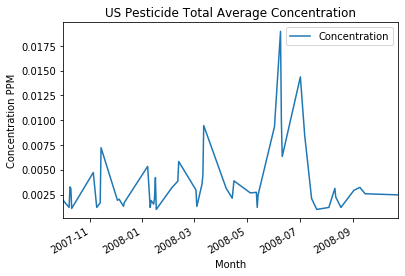

In [33]:
y_value.plot(kind='line')
plt.title('US Pesticide Total Average Concentration')
plt.xlabel('Month')
plt.ylabel('Concentration PPM')

plt.savefig('output_images/line_US_pesticide_concentrations.png', bbox_inches='tight')

In [16]:
# COnvert field to datetime will plot auto dates and axis more meaningful.

In [17]:
df_domestic_tx = df_domestic.loc[df_domestic['State'] == 'TX']
df_domestic_tx.sort_values(by='Month', ascending=True)

,Sample ID,Commodity,Pesticide Code,Pesticide Name,Concentration,LOD,pp_,Annotate,Quantitate,Mean,...,Commodity Claim,Facility Type,Origin,State,EPA Tolerance (ppm),Date,y,m,d,Month
54,TX0710010103HYUS2,HY,124,Coumaphos,0.0024,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2001-07-10,07,10,01,2007-10-01
55,TX0710010105HYUS2,HY,124,Coumaphos,0.0016,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2001-07-10,07,10,01,2007-10-01
57,TX0712030103HYUS2,HY,124,Coumaphos,0.0015,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2003-07-12,07,12,03,2007-12-03
38,MD0712050005HYUS2,HY,124,Coumaphos,0.0012,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2005-07-12,07,12,05,2007-12-05
179,MD0801160005HYUS2,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0055,0.004,M,NaN,SM,O,...,NC,D,1,TX,1,2016-08-01,08,01,16,2008-01-16
248,TX0802040212HYUS2,HY,124,Coumaphos,0.0014,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2004-08-02,08,02,04,2008-02-04
182,MD0802110005HYUS2,HY,124,Coumaphos,0.0016,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2011-08-02,08,02,11,2008-02-11
249,TX0803030103HYUS2,HY,124,Coumaphos,0.0010,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.15,2003-08-03,08,03,03,2008-03-03
250,TX0803030103HYUS2,HY,297,Fluvalinate,0.0011,0.001,M,NaN,SM,O,...,NC,D,1,TX,0.05,2003-08-03,08,03,03,2008-03-03
251,TX0803030103HYUS2,HY,AGR,"2,4-dimethylphenyl formamide (2,4-DMPF)",0.0058,0.004,M,NaN,SM,O,...,NC,D,1,TX,1,2003-08-03,08,03,03,2008-03-03


In [18]:
df_domestic_tx_values = df_domestic_tx.groupby('Month').mean()
tex_y_values = df_domestic_tx_values.drop(columns=['LOD','Origin'])

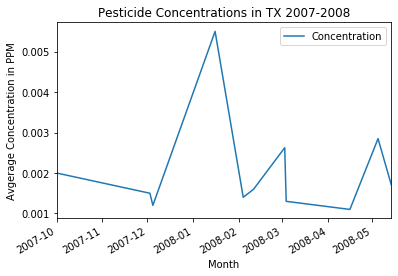

In [32]:
tex_y_values.plot(kind='line')
plt.title('Pesticide Concentrations in TX 2007-2008')
plt.ylabel('Avgerage Concentration in PPM')

plt.savefig('output_images/tex_pesticides.png', bbox_inches='tight')

In [20]:
df_pesticide_data = df_sort_date[['Pesticide Name', 'Concentration', 'State', 'Month']]
df_pesticide_data

,Pesticide Name,Concentration,State,Month
68,Coumaphos,0.0029,WI,2007-10-01
20,"Dicofol p,p'",0.0021,CO,2007-10-01
63,Coumaphos,0.0010,AR,2007-10-01
49,Dicloran,0.0010,IA,2007-10-01
54,Coumaphos,0.0024,TX,2007-10-01
...,...,...,...,...
172,Coumaphos,0.0011,FL,2008-09-15
173,Piperonyl butoxide,0.0080,KS,2008-09-15
119,Coumaphos,0.0038,CA,2008-10-23
120,"Dicofol p,p'",0.0023,KS,2008-10-23


In [21]:
df_group_pesticides = df_pesticide_data.groupby(['State', 'Pesticide Name']).mean()
df_group_pesticides.unstack()

Concentration                         \
Pesticide Name 2,4-dimethylphenyl formamide (2,4-DMPF) Chlorpyrifos Coumaphos   
State                                                                           
AR                                            0.017250          NaN  0.001325   
AZ                                            0.019200          NaN       NaN   
CA                                            0.010556          NaN  0.002367   
CO                                                 NaN          NaN       NaN   
FL                                            0.025500          NaN  0.001504   
IA                                            0.007200       0.0013  0.001740   
ID                                            0.007267          NaN  0.002067   
IL                                            0.012000          NaN  0.001700   
KS                                            0.006720          NaN  0.001433   
MD                                            0.006200          NaN  0.001314   
ME                                                 NaN          NaN  0.002000   
MI                                            0.006425          NaN  0.001325   
MN                                                 NaN          NaN  0.001400   
NH                                                 NaN          NaN  0.004700   
NJ                                                 NaN          NaN  0.001100   
NY                                            0.029850          NaN  0.004000   
OH                                            0.019650          NaN  0.002800   
OR                                                 NaN          NaN  0.001500   
PA                                                 NaN          NaN  0.001075   
TN                                                 NaN          NaN  0.002200   
TX                                            0.005650          NaN  0.001667   
WA                                            0.017550          NaN  0.001500   
WI                                                 NaN          NaN  0.001733   

                                                                  \
Pesticide Name Dicloran Dicofol p,p' Fluvalinate Methoxyfenozide   
State                                                              
AR                  NaN          NaN    0.001800             NaN   
AZ                  NaN     0.001000    0.001700             NaN   
CA                  NaN     0.001550    0.002700          0.0028   
CO                  NaN     0.001600         NaN             NaN   
FL                  NaN     0.001750    0.002464             NaN   
IA               0.0013     0.002375    0.003567             NaN   
ID                  NaN     0.002650    0.001450             NaN   
IL                  NaN     0.002900    0.001650             NaN   
KS                  NaN     0.002300    0.001725             NaN   
MD                  NaN          NaN         NaN             NaN   
ME                  NaN          NaN         NaN             NaN   
MI                  NaN          NaN    0.002300             NaN   
MN                  NaN          NaN         NaN             NaN   
NH                  NaN          NaN         NaN             NaN   
NJ                  NaN          NaN         NaN             NaN   
NY                  NaN          NaN    0.001250             NaN   
OH                  NaN     0.002200    0.003660             NaN   
OR                  NaN          NaN         NaN             NaN   
PA                  NaN     0.001200         NaN             NaN   
TN                  NaN          NaN         NaN             NaN   
TX                  NaN          NaN    0.002100             NaN   
WA                  NaN          NaN         NaN             NaN   
WI                  NaN     0.003400         NaN             NaN   

                                               
Pesticide Name Piperonyl butoxide Vinclozolin  
State                                          
AR                   

In [22]:
df_group_pesticides

Concentration
State Pesticide Name                                        
AR    2,4-dimethylphenyl formamide (2,4-DMPF)       0.017250
      Coumaphos                                     0.001325
      Fluvalinate                                   0.001800
AZ    2,4-dimethylphenyl formamide (2,4-DMPF)       0.019200
      Dicofol p,p'                                  0.001000
...                                                      ...
TX    Fluvalinate                                   0.002100
WA    2,4-dimethylphenyl formamide (2,4-DMPF)       0.017550
      Coumaphos                                     0.001500
WI    Coumaphos                                     0.001733
      Dicofol p,p'                                  0.003400

[67 rows x 1 columns]

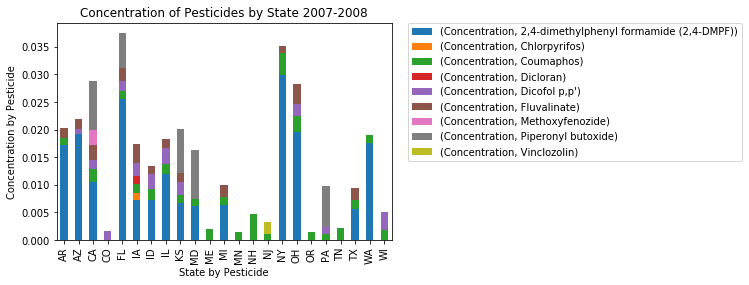

In [30]:
g_hist_pesticide = df_group_pesticides.unstack().plot(kind='bar', stacked=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Concentration of Pesticides by State 2007-2008')
plt.xlabel('State by Pesticide')
plt.ylabel('Concentration by Pesticide')

plt.savefig('output_images/hist_pest.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>